In [1]:
import numpy as np
import os
from sklearn.datasets import fetch_mldata

In [12]:
path = os.getcwd()

mnist = fetch_mldata("mnist_original",data_home=path)
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist_original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [7]:
X, y = mnist['data'], mnist['target']

In [8]:
X.shape

(70000, 784)

In [13]:
# 为了机器学习方便, 讲uint型的数据转化成float
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

# 使用KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)
# Wall time: 55.6 s

Wall time: 55.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
%time knn_clf.score(X_test, y_test)
# Wall time: 16min 7s
# 0.9688

Wall time: 16min 7s


0.9688

# PCA降维

In [2]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)

In [19]:
X_train_reduction.shape

(60000, 87)

In [20]:
knn_clf_pca = KNeighborsClassifier()
%time knn_clf_pca.fit(X_train_reduction, y_train)
# Wall time: 908 ms

Wall time: 908 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
X_test_reduction = pca.transform(X_test)

In [22]:
%time knn_clf_pca.score(X_test_reduction, y_test)
# Wall time: 1min 46s
# 0.9728

Wall time: 1min 46s


0.9728

# PCA的降噪效果

### 手写识别的例子

In [3]:
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [5]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)
example_digits = noisy_digits[y==0, :][:10]

for num in range(1,10):
    x_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, x_num])

example_digits.shape

(100, 64)

In [6]:
import matplotlib.pyplot as plt

def plot_digits(data):
    fig, axes = plt.subplots(10,10, figsize=(10,10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', 
                  interpolation='nearest', clim=(0, 16))
    plt.show()

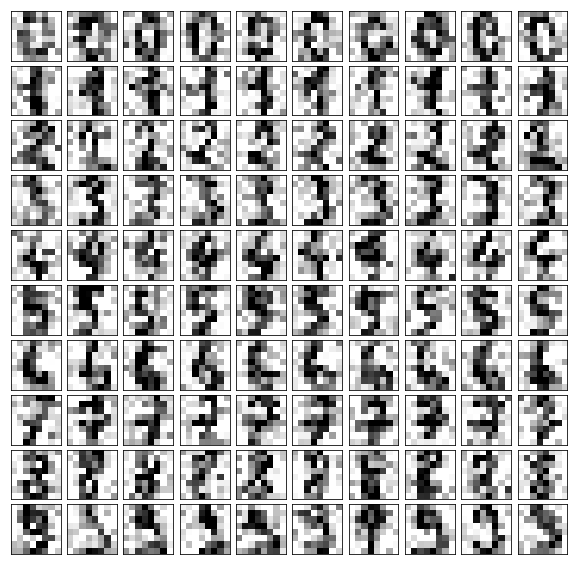

In [11]:
plot_digits(example_digits)

In [7]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.n_components_

12

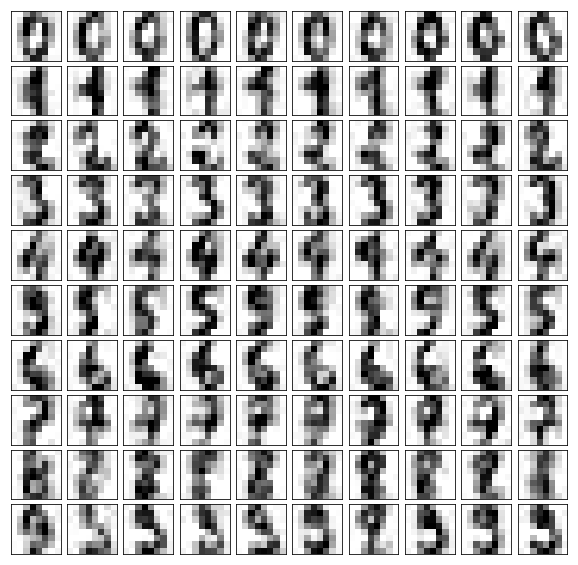

In [9]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)